In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_train= pd.read_csv("/Users/timotheeballand/Documents/Data mining machine learning /Project/train.csv")
df_test= pd.read_csv("/Users/timotheeballand/Documents/Data mining machine learning /Project/test.csv")

In [85]:
df_train['satisfaction'].head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

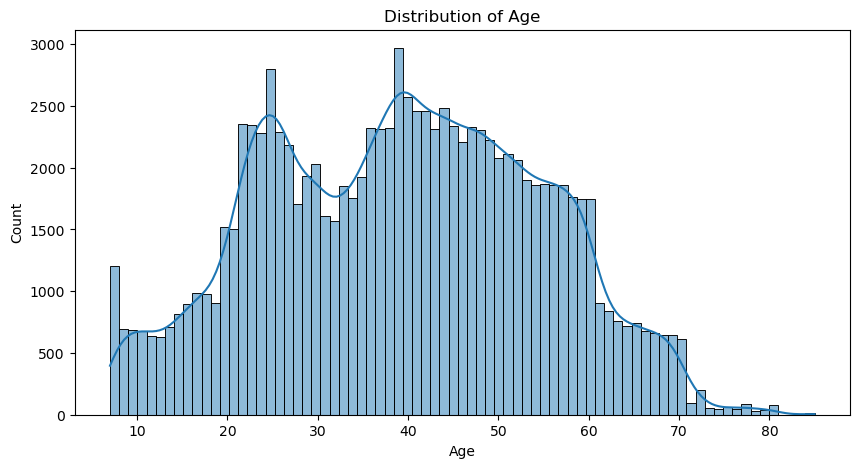

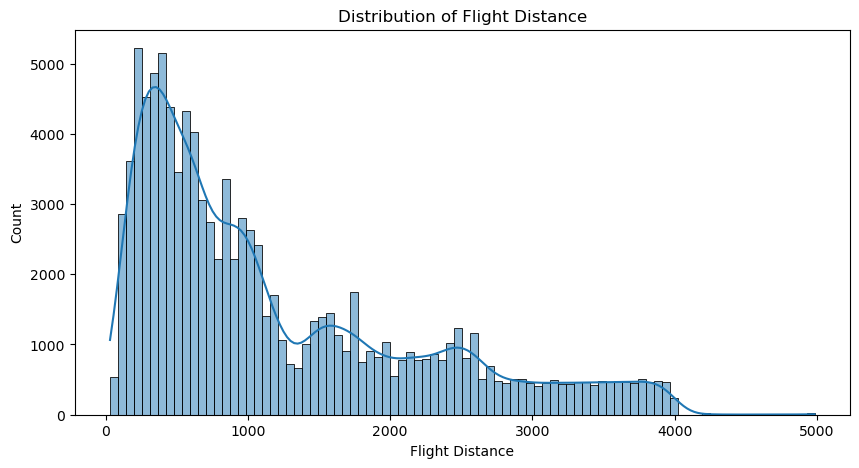

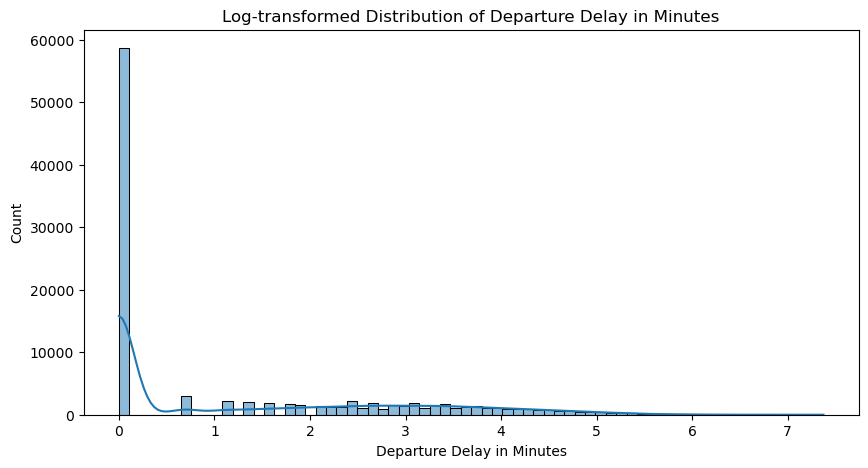

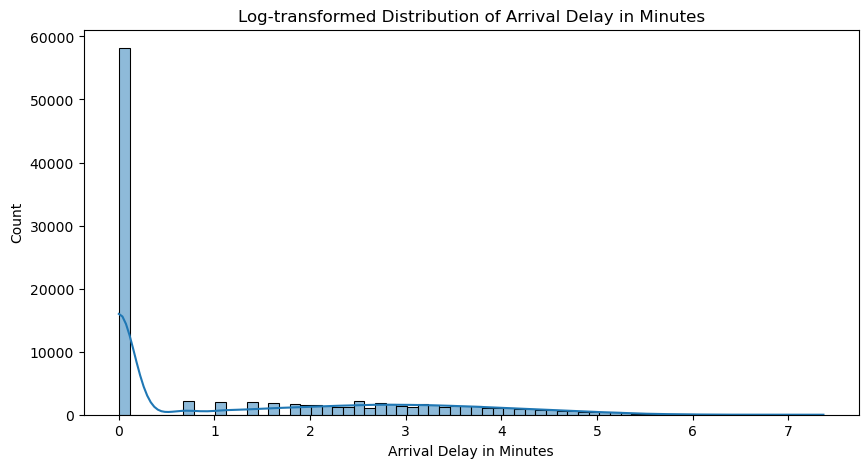

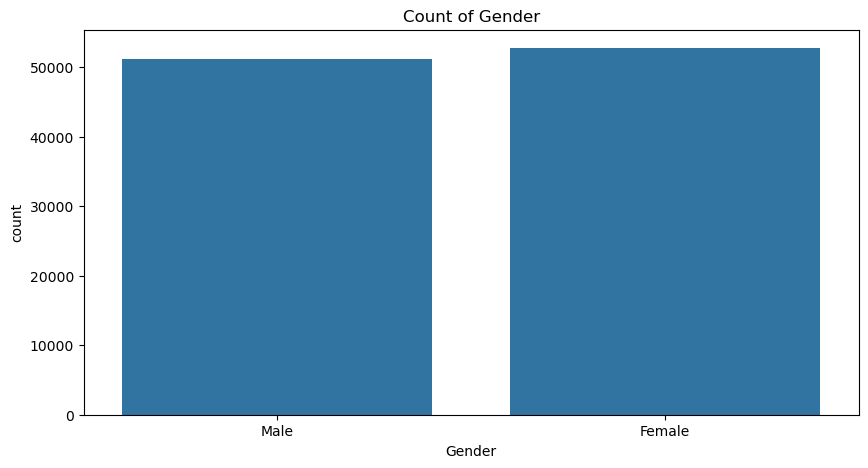

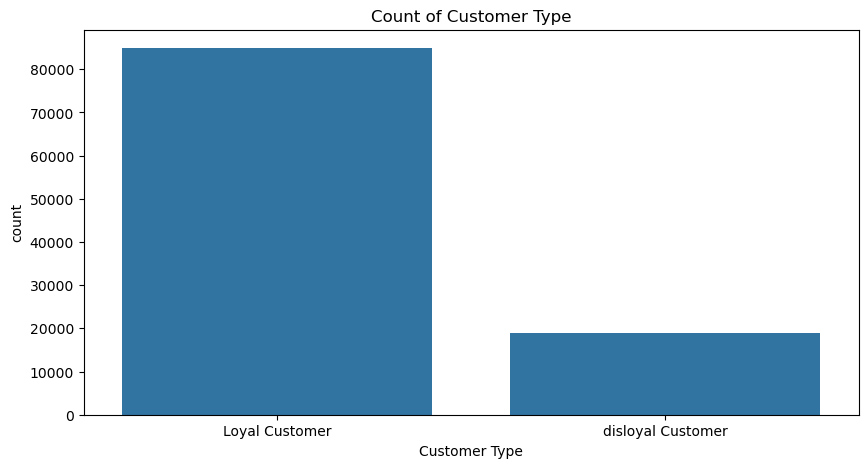

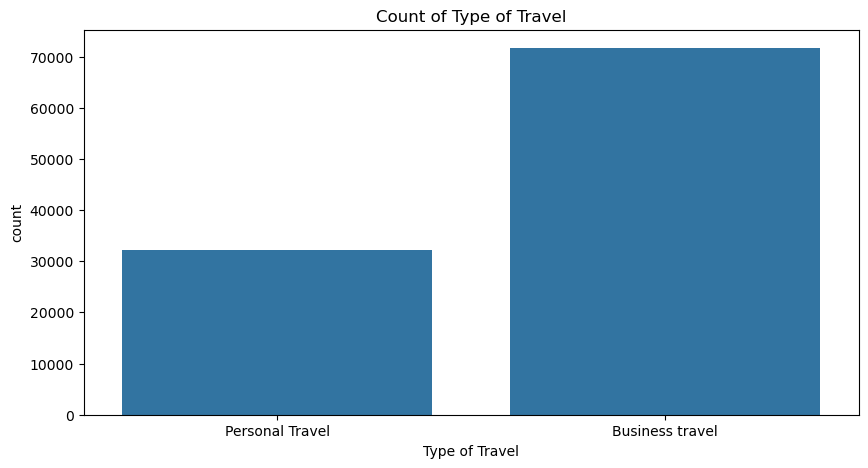

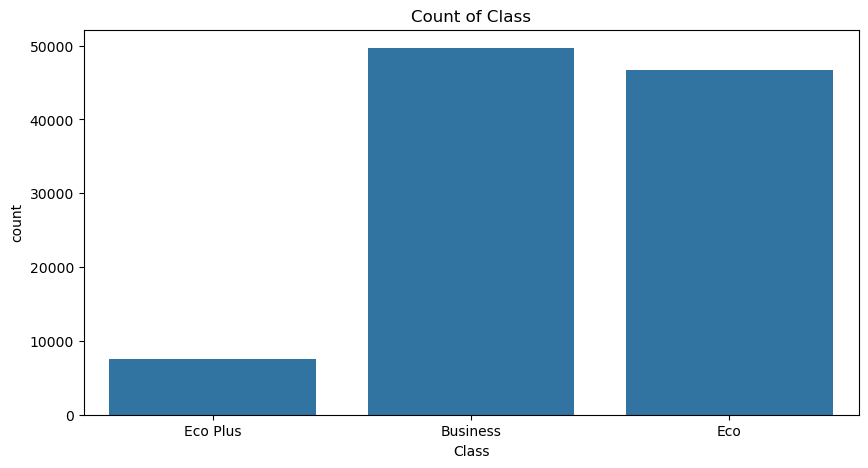

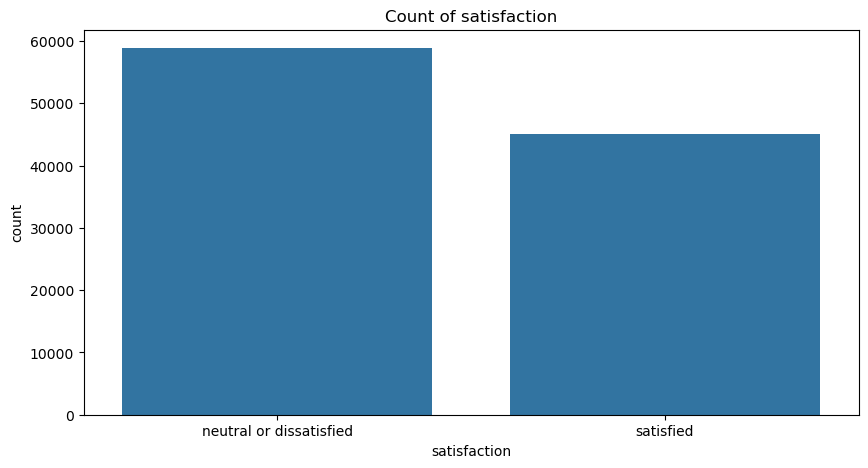

In [86]:
# Display the first few rows of the dataset
print(df_train.head())

# Summary of the dataset
print(df_train.info())
print(df_train.describe())

# Check for missing values
print("Missing values in each column:\n", df_train.isnull().sum())


# Plot distributions of continuous features
continuous_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for feature in continuous_features:
    plt.figure(figsize=(10, 5))

    # Apply log transformation for features with a large skew, like delays
    if feature in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
        # Add a small constant to avoid log(0) errors
        transformed_data = np.log1p(df_train[feature])  # log(x + 1) to handle 0 values

        # Plot the transformed data
        sns.histplot(transformed_data, kde=True)
        plt.title(f'Log-transformed Distribution of {feature}')
    else:
        # Plot the original data for other features
        sns.histplot(df_train[feature], kde=True)
        plt.title(f'Distribution of {feature}')

    plt.show()

# Plot distributions of categorical features
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_train, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()



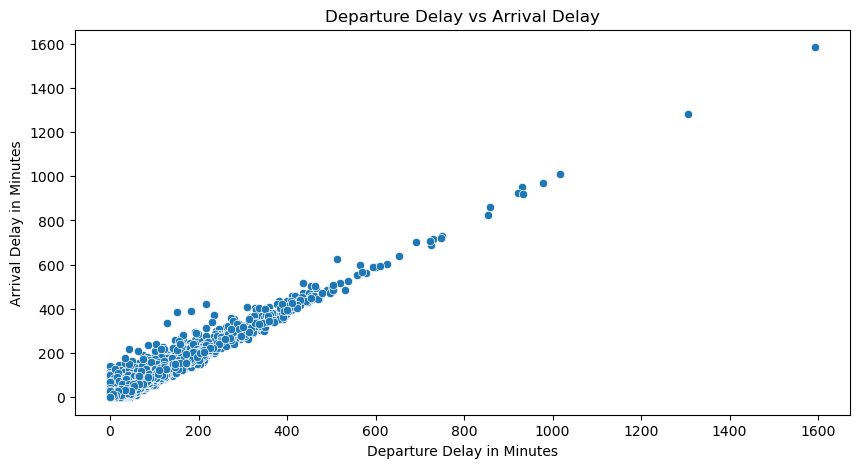

In [87]:
#scatter plot delay arrival vs departure

plt.figure(figsize=(10,5))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df_train)
plt.title('Departure Delay vs Arrival Delay')
plt.show()


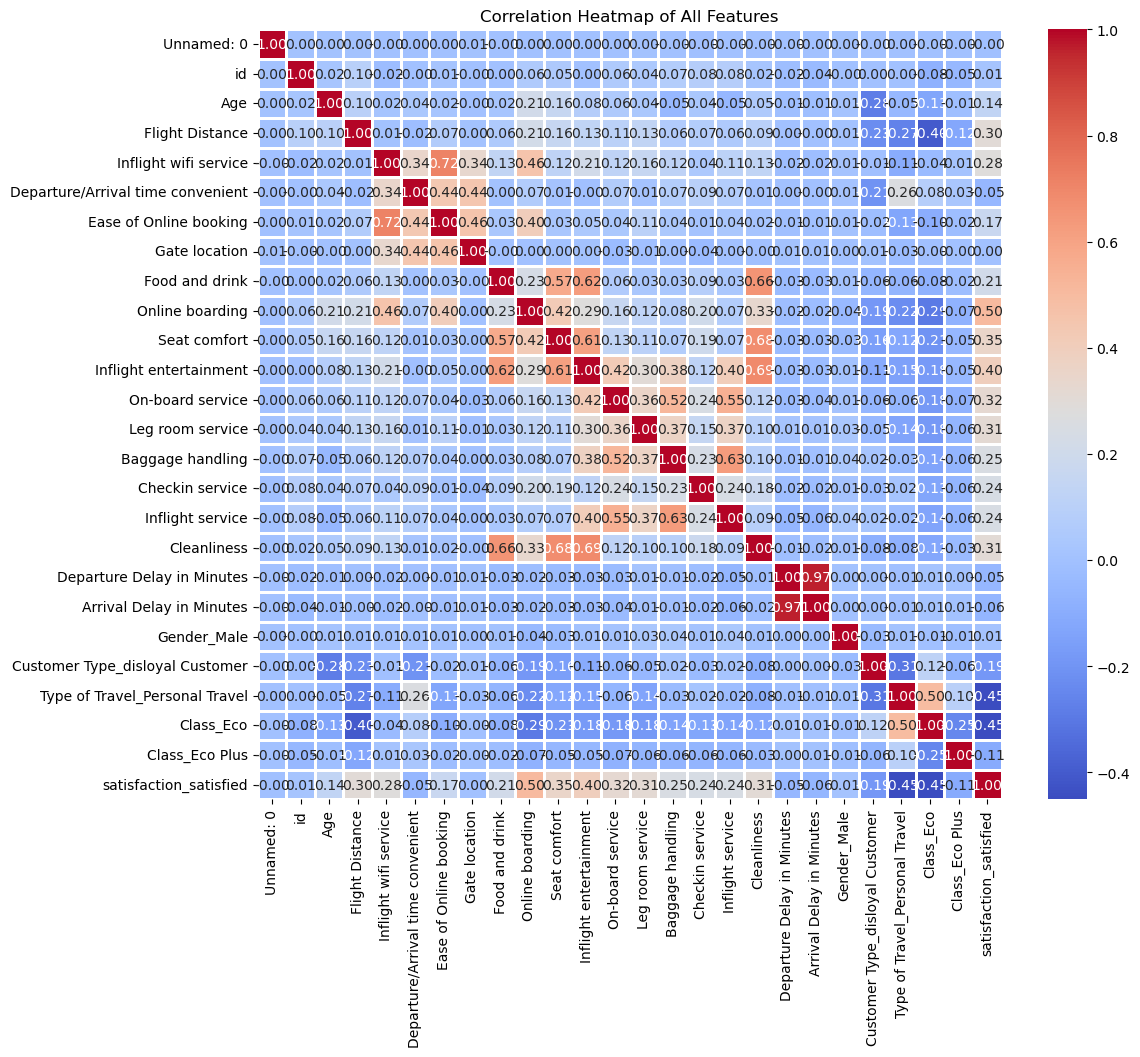

In [88]:
# Convert categorical features to numeric using get_dummies or LabelEncoder
# Using get_dummies for all categorical features
df_encoded = pd.get_dummies(df_train, drop_first=True)  # drop_first=True to avoid multicollinearity

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of All Features')
plt.show()


In [89]:
# Get the correlation values for churn_flag_Existing Customer
sat_correlation = correlation_matrix['satisfaction_satisfied']

# Sort the correlation values in descending order and get the top 10
top_10_correlated = sat_correlation.sort_values(ascending=False).head(26)  # Including the correlation with itself

# Drop the correlation with itself
top_10_correlated = top_10_correlated.drop('satisfaction_satisfied')

# Display the top 10 correlated values
print(top_10_correlated)

Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
id                                   0.013734
Gender_Male                          0.012211
Gate location                        0.000682
Unnamed: 0                          -0.004731
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057582
Class_Eco Plus                    

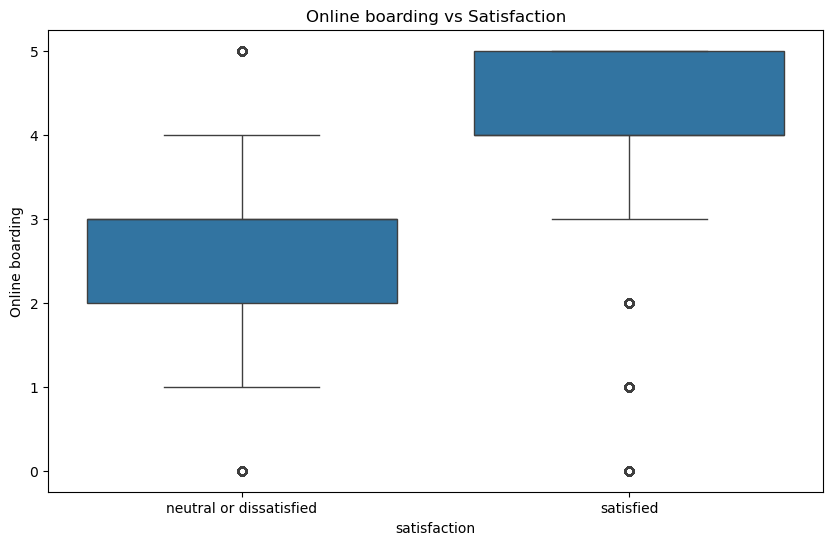

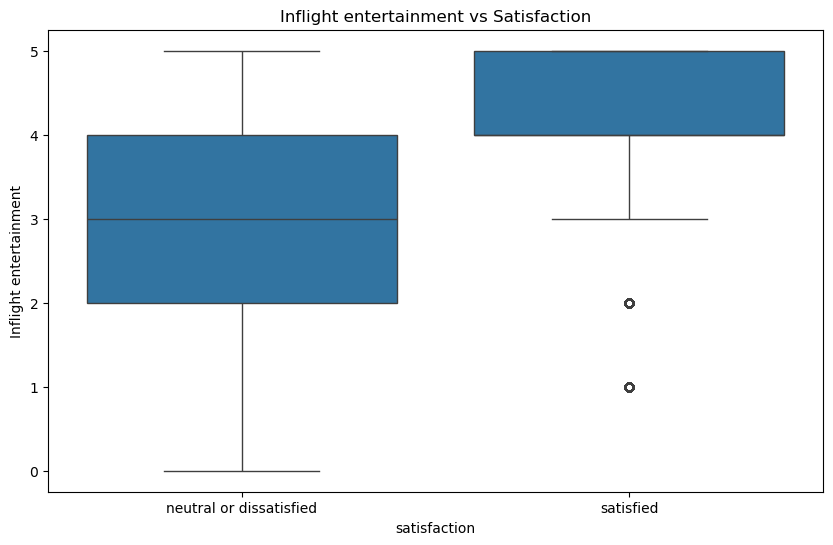

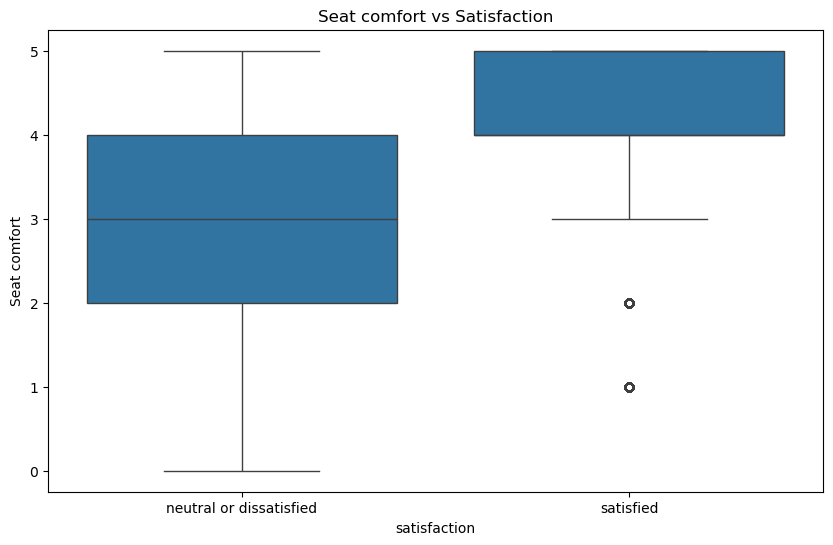

In [90]:
# Visualisation conditionnelle des variables les plus corrélées
top_features = ['Online boarding', 'Inflight entertainment', 'Seat comfort']
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='satisfaction', y=feature, data=df_train)
    plt.title(f'{feature} vs Satisfaction')
    plt.show()


In [91]:
from scipy.stats import ttest_ind, chi2_contingency

# Tests t-test pour les variables continues
for feature in top_features:
    group1 = df_train[df_train['satisfaction'] == 'satisfied'][feature]
    group2 = df_train[df_train['satisfaction'] == 'neutral or dissatisfied'][feature]
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    print(f'T-test for {feature}: p-value = {p_val:.4f}')

# Tests du Chi2 pour les variables catégoriques
cat_features = ['Type of Travel', 'Class', 'Customer Type']
for feature in cat_features:
    contingency_table = pd.crosstab(df_train[feature], df_train['satisfaction'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f'Chi2 Test for {feature} vs Satisfaction: p-value = {p:.4f}')


T-test for Online boarding: p-value = 0.0000
T-test for Inflight entertainment: p-value = 0.0000
T-test for Seat comfort: p-value = 0.0000
Chi2 Test for Type of Travel vs Satisfaction: p-value = 0.0000
Chi2 Test for Class vs Satisfaction: p-value = 0.0000
Chi2 Test for Customer Type vs Satisfaction: p-value = 0.0000


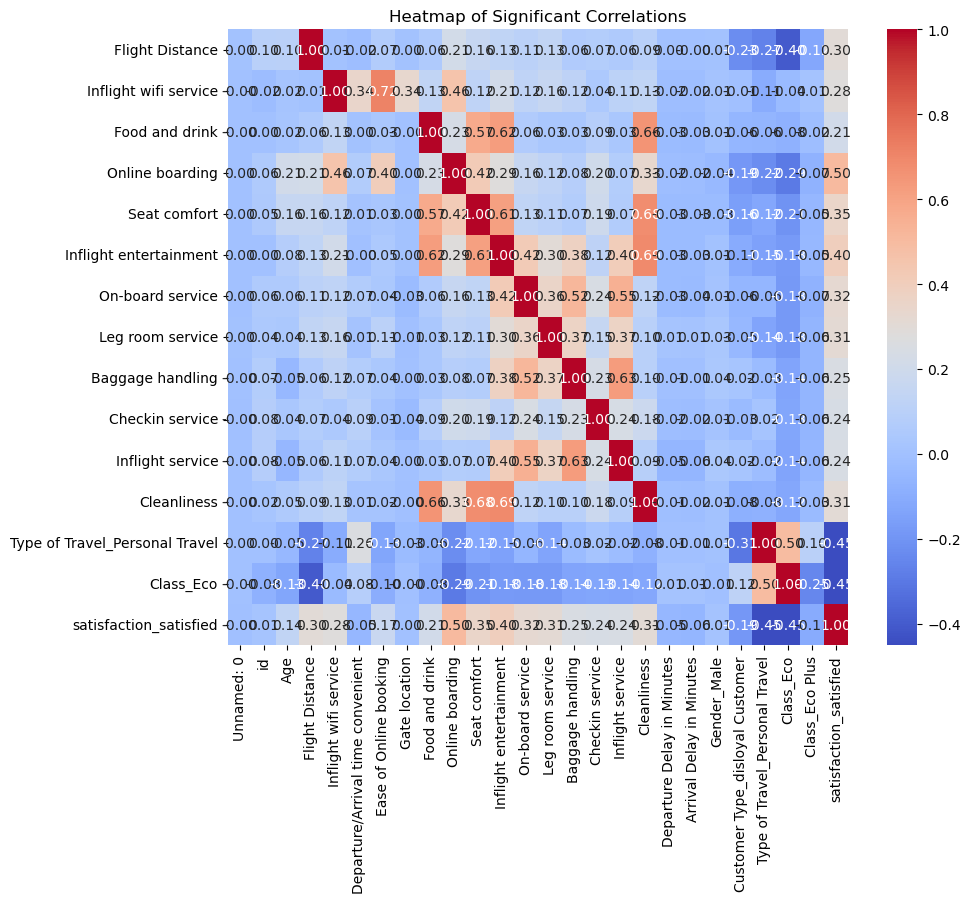

In [92]:
# Filtrer les variables ayant une corrélation significative
significant_corr = correlation_matrix[abs(correlation_matrix['satisfaction_satisfied']) > 0.2]
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Significant Correlations')
plt.show()


DecisionTreeClassifier
 
Accuracy: 0.95
Precision: 0.94
Recall: 0.94
F1-Score: 0.94
Area Under ROC Curve (AUC): 0.94

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     11713
        True       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.95     20781
weighted avg       0.95      0.95      0.95     20781


Confusion Matrix:
[[11156   557]
 [  567  8501]]


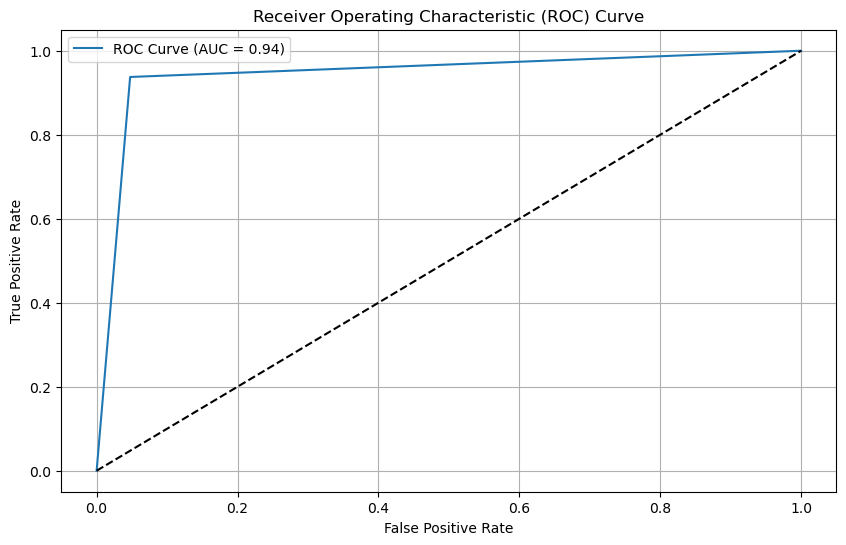

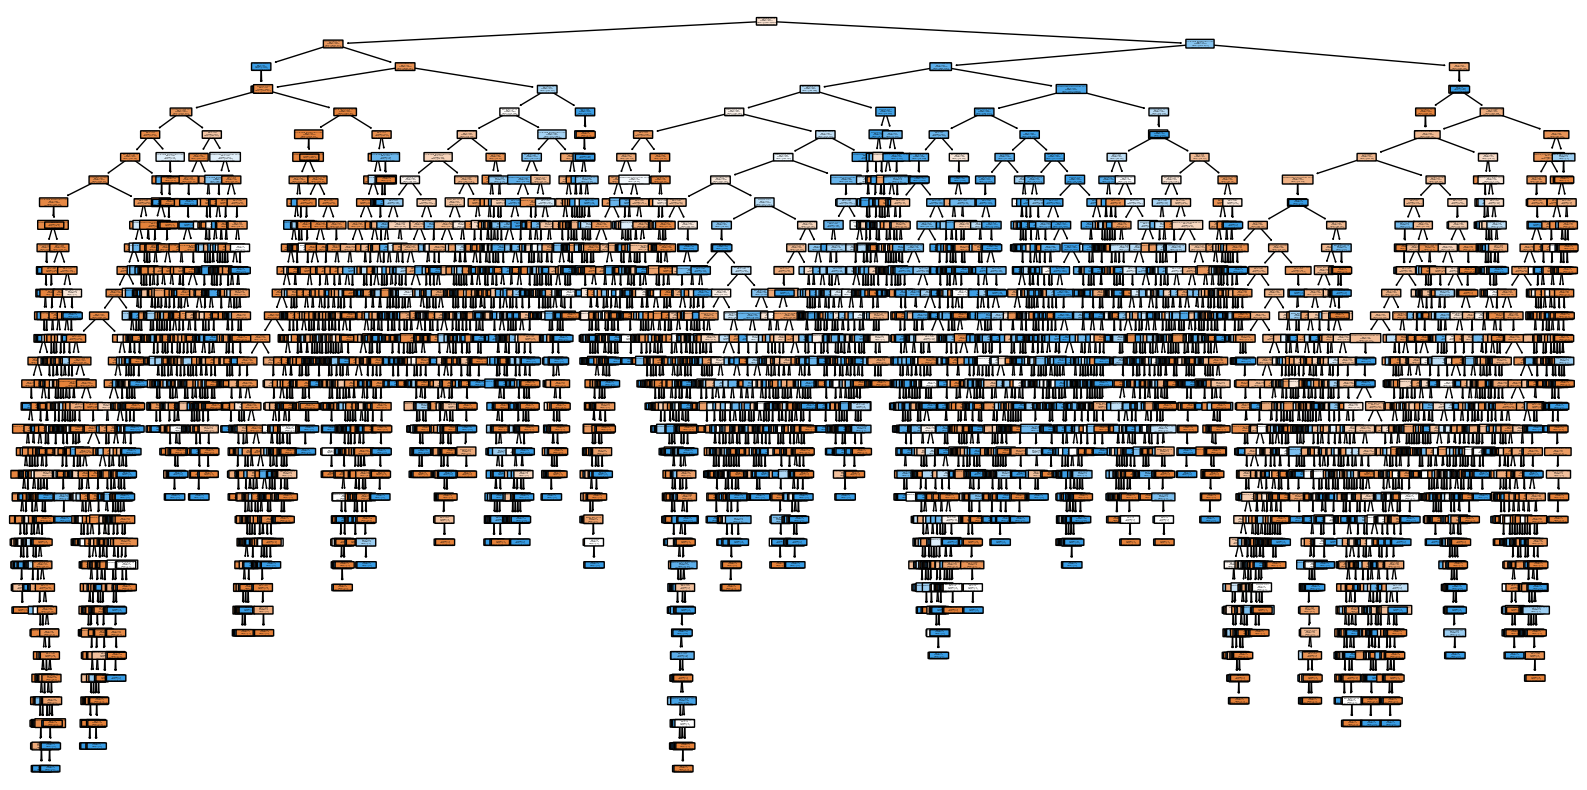

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_fscore_support
)
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the features and target variable
X = df_encoded.drop(columns=['satisfaction_satisfied'])
y = df_encoded['satisfaction_satisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("DecisionTreeClassifier")
print(" ")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Attrited Customer', 'Existing Customer'], filled=True, rounded=True)
plt.show()

Logistic Regression Accuracy: 0.88
Precision: 0.88
Recall: 0.84
F1-Score: 0.86
Area Under ROC Curve (AUC): 0.93

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     11713
        True       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.88     20781
weighted avg       0.88      0.88      0.88     20781


Logistic Regression Confusion Matrix:
[[10624  1089]
 [ 1432  7636]]


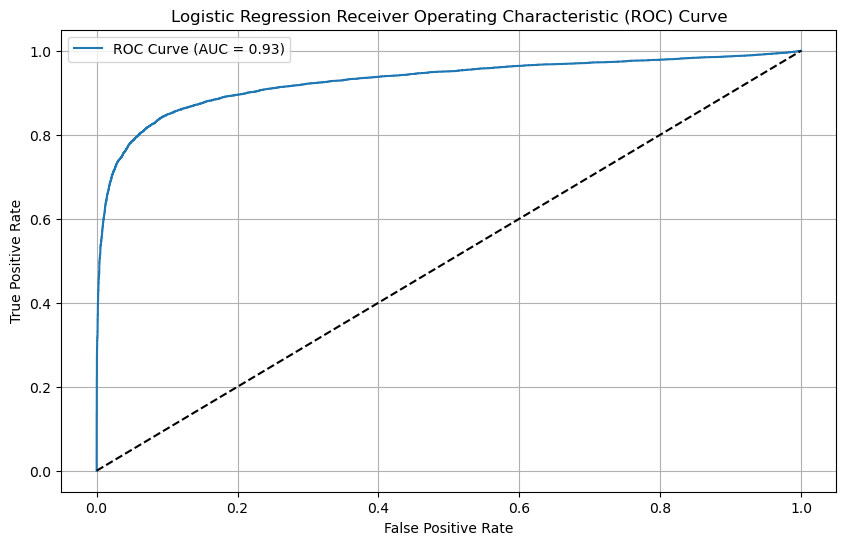

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model with a higher max_iter and a different solver
log_reg = LogisticRegression(random_state=42, max_iter=2000, solver='saga')

# Train the model on scaled data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg, recall_log_reg, f1_log_reg, _ = precision_recall_fscore_support(y_test, y_pred_log_reg, average='binary')
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

# Print the evaluation metrics
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print(f'Precision: {precision_log_reg:.2f}')
print(f'Recall: {recall_log_reg:.2f}')
print(f'F1-Score: {f1_log_reg:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc_log_reg:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg))
print('\nLogistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))

# Plot the ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'ROC Curve (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


Random Forest Accuracy: 0.96
Area Under ROC Curve (AUC): 0.99

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     11713
        True       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781


Random Forest Confusion Matrix:
[[11489   224]
 [  526  8542]]


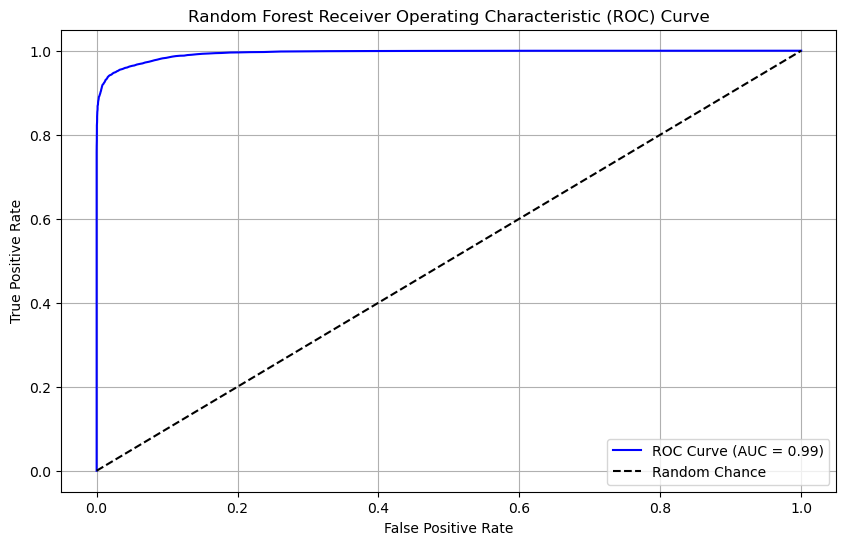

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the random forest classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Print the evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc_rf:.2f}')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Plot the ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

KNN Accuracy: 0.60
Area Under ROC Curve (AUC): 0.61

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.71      0.67     11713
        True       0.55      0.45      0.50      9068

    accuracy                           0.60     20781
   macro avg       0.59      0.58      0.58     20781
weighted avg       0.59      0.60      0.59     20781


KNN Confusion Matrix:
[[8353 3360]
 [4949 4119]]


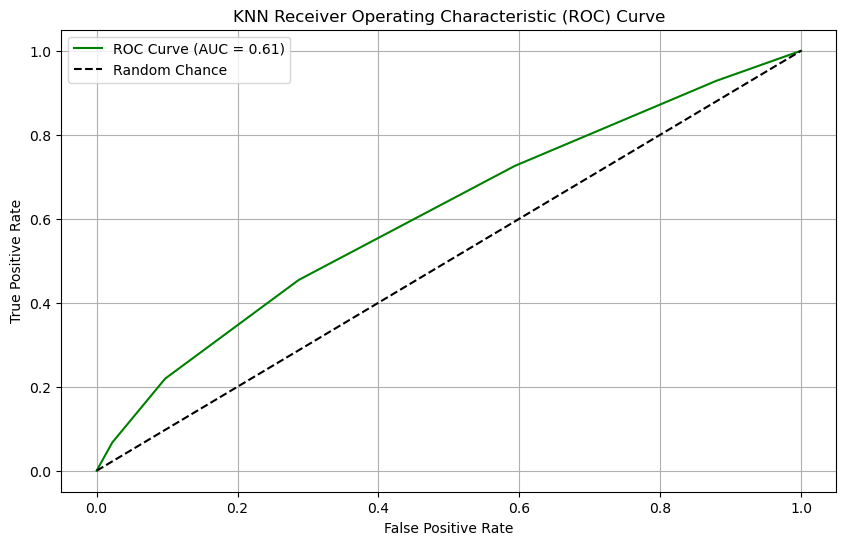

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Print the evaluation metrics
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc_knn:.2f}')
print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('\nKNN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

# Plot the ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object for Decision Tree
grid_search_dt.fit(X_train, y_train)

# Fit the GridSearchCV object for Random Forest
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

# Print the best parameters and best score for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree: 0.9465010015413895
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.963271313509954


DecisionTreeClassifier with Best Parameters
 
Accuracy: 0.95
Precision: 0.95
Recall: 0.93
F1-Score: 0.94
Area Under ROC Curve (AUC): 0.97

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96     11713
        True       0.95      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781


Confusion Matrix:
[[11267   446]
 [  591  8477]]


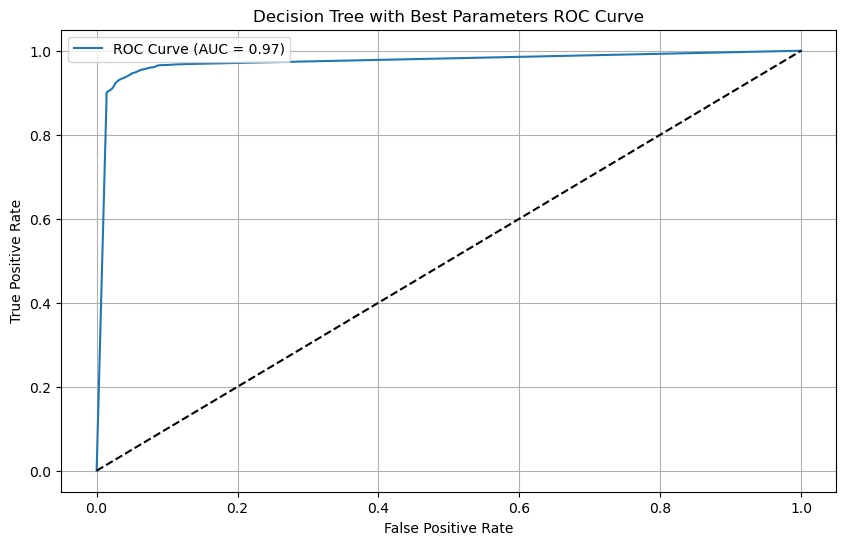

Random Forest with Best Parameters Accuracy: 0.96
Area Under ROC Curve (AUC): 0.99

Random Forest with Best Parameters Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     11713
        True       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781


Random Forest with Best Parameters Confusion Matrix:
[[11486   227]
 [  524  8544]]


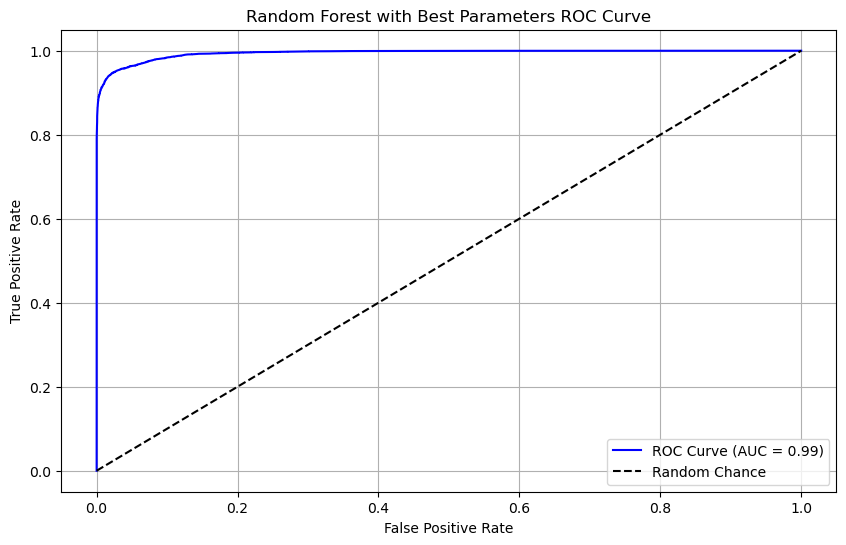

In [98]:
# Best parameters from GridSearchCV
best_params_dt = grid_search_dt.best_params_
best_params_rf = grid_search_rf.best_params_

# Create the decision tree classifier with the best parameters
clf_best = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Train the classifier
clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = clf_best.predict(X_test)
y_pred_proba_best = clf_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best, recall_best, f1_best, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary')
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("DecisionTreeClassifier with Best Parameters")
print(" ")
print(f'Accuracy: {accuracy_best:.2f}')
print(f'Precision: {precision_best:.2f}')
print(f'Recall: {recall_best:.2f}')
print(f'F1-Score: {f1_best:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc_best:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_best))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))

# Plot the ROC Curve
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Best Parameters ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Create the random forest classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the classifier
rf_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_best = rf_clf_best.predict(X_test)
y_pred_proba_rf_best = rf_clf_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the classifier
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
roc_auc_rf_best = roc_auc_score(y_test, y_pred_proba_rf_best)

print(f'Random Forest with Best Parameters Accuracy: {accuracy_rf_best:.2f}')
print(f'Area Under ROC Curve (AUC): {roc_auc_rf_best:.2f}')
print('\nRandom Forest with Best Parameters Classification Report:')
print(classification_report(y_test, y_pred_rf_best))
print('\nRandom Forest with Best Parameters Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf_best))

# Plot the ROC Curve
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_pred_proba_rf_best)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f'ROC Curve (AUC = {roc_auc_rf_best:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Best Parameters ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()